In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [3]:
data=pd.read_csv('/kaggle/input/titanic/train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [6]:
data['Age']=impute_na(data,'Age')

In [7]:


data.isnull().sum()



Survived    0
Age         0
Fare        0
dtype: int64

In [18]:
# Q-Q plot


In [8]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

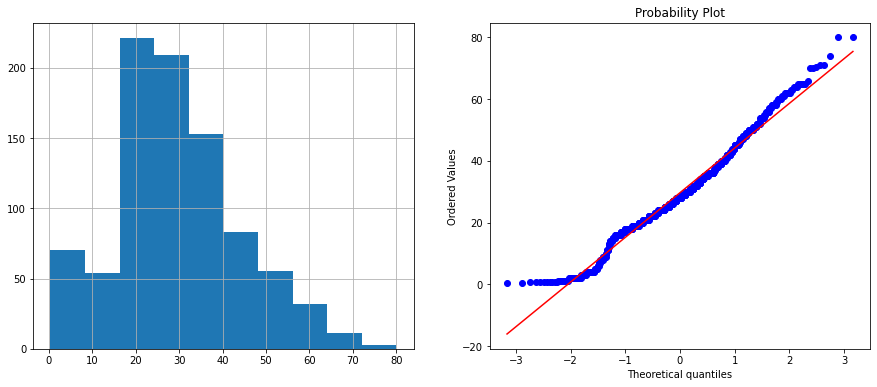

In [9]:


diagnostic_plots(data, 'Age')



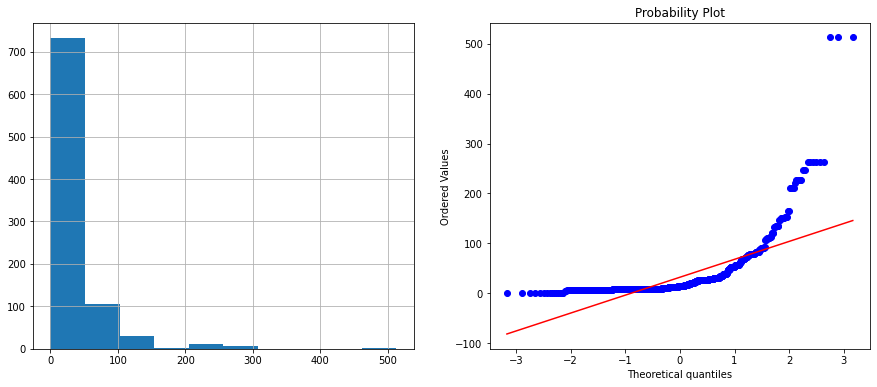

In [11]:
diagnostic_plots(data, 'Fare')



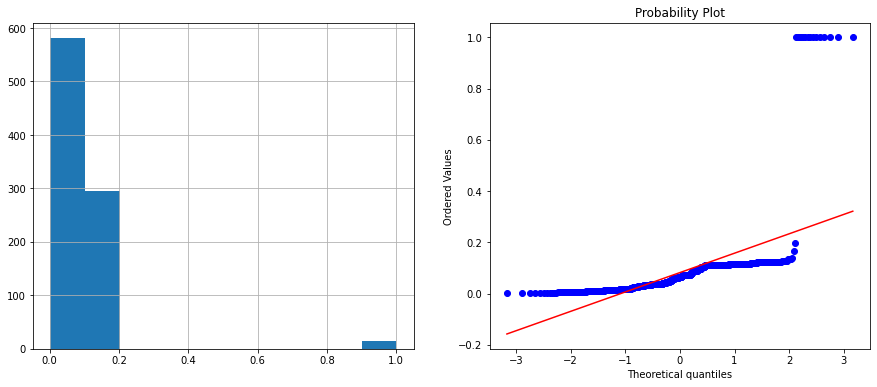

In [12]:
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

In [ ]:
#BOXCOX

Optimal lambda:  -0.09778702818680361


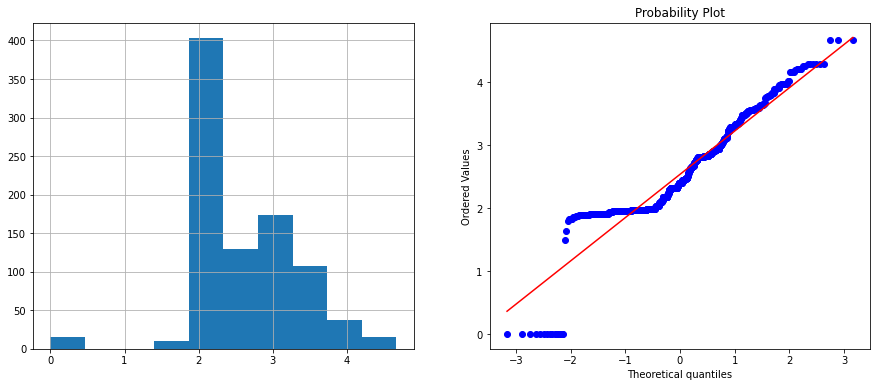

In [17]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed
print('Optimal lambda: ', param)
diagnostic_plots(data, 'Fare_boxcox')